# Prediction of CO2 emissions from country-specific data

***

# Stage 2: Data exploration, visualization, and feature enigneering 

***

### Notebook Contents:
0. Introduction
1. Notebook setup - libraries and data import, notes on the data source
2. Global data overview
3. Feature/column abbreviations and units
4. Definition of the hypothesis to be tested
5. Feature engineering
    - features overview
    - derivation of additional important features
    - removal of unnecessary features
6. Prepare the visualization
7. Create plots 
    - a global look onto all relationships and detailed plots of chosen dependencies
    - correlation matrix heatmaps
    - scatterplots, histograms
    - detection of outliers
    - discussion of dependencies and trends
8. Conclusions

***

## 0. Introduction

### Project summary
**Aim of the project**:
Analysis of country-specific data and development of machine learning models in order to predict CO2 emissions from country parameters. The project uses the publicly available dataset ESG Data from the World Bank Group, which provides data on the vast majority of countries over a range of years for parameters such as:

* country: the vast majority of countries worldwide
* year: ranging from 1990 to 2023
* CO2 emissions 
* population-specific parameter: Population density
* country economic indicators: GDP, GNI, Unemployment, etc.
* land-related parameters: Food production index, Agricultural land, and marine protected areas, Tree Cover Loss, etc.
* climate data: Nitrous oxide emissions, Cooling Degree Days, Heat Index 35 etc.
* energy use: Electricity production from coal sources, Renewable electricity output, Energy use, etc
* certain types of medical data: Life expectancy at birth, etc
* etc.

The project is divided into three stages:

1. Data cleaning and preparation
2. Data exploration, visualization, and feature engineering
3. Predictive analysis with varios machine learning algorithms

Each of the stages is described in a separate Jupyter Notebook (.ipynb file).

***

### Notebook summary - Stage 2: Data exploration and visualization

**Aim of this notebook**: The subject of this particular notebook is to gain first data insights from descriptive statistics, visualize relevant dependencies and identify global trends. This is especially necessary for the proper choice of relevant/important features and of suitable machine learning algorithms for the predictive analysis.

**Input**: cleaned dataset from the csv data file (output of Stage 1 of the project)

**Output**: plots, visualizations, summaries, trends, insights, conclusions

**Programming language**: Python 3.8

**Libraries used in this notebook**: seaborn, matplotlib, pandas, numpy

***

### Data source

The used data comes from the Environment, Social And Governance Data of the World Bank Group, which provides country-specific data on parameters such as CO2 emissions, energy use, Population density, Agricultural land, GDP, GNI, etc.


The dataset is publicly available at https://datacatalog.worldbank.org/search/dataset/0037651/Environment--Social-and-Governance-Data and licenced under the <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>.

***

## 1. Notebook Setup
Libraries and dataset import:

In [8]:
# import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# align the units of features for machine learning tasks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

file_path = 'Desktop/1.Semester/MachineLearing/Project/CO2/data/data_cleaned2.csv' # please adjust the path to the file


# import the cleaned dataset from a csv file
data = pd.read_csv(file_path)



## 2. Global overview of the available data

A global overview of the imported data yields the following insights:

In [77]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,...,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc
0,Albania,2000,38.7,99.430855,0.467306,0.122940,41.751825,24.515412,1.031568,710.17,...,27.2,-63610.0,0.384636,7.821964,112.738212,69.454576,41.36,22.34,-2.147378,19.028
1,Albania,2001,41.0,99.421989,0.286160,0.060695,41.569343,22.716164,1.056868,686.38,...,25.8,-62059.0,0.375930,8.145374,111.685146,69.303040,39.04,18.38,-1.776391,18.575
2,Albania,2002,43.8,99.404579,0.296077,0.064922,41.605839,22.025114,1.233002,566.02,...,24.4,-59876.0,0.425487,8.508105,111.350730,69.232075,35.82,24.53,0.058111,17.895
3,Albania,2003,46.5,99.385628,0.312900,0.061352,40.912409,21.978257,1.361159,931.89,...,22.9,-57308.0,0.431772,8.899816,110.934890,69.876243,33.67,22.82,-0.869403,16.989
4,Albania,2004,49.2,99.372139,0.365360,0.052754,40.948905,20.537486,1.427944,554.96,...,21.5,-54383.0,0.420342,9.308444,110.472226,70.592238,35.84,17.91,-0.052818,16.310


In [78]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(3360, 32)

In [79]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


country                                object
year                                    int64
clean_fuel_access_perc                float64
elec_access_perc                      float64
nat_res_depl_perc                     float64
forest_depl_perc                      float64
agri_land_perc                        float64
agri_forest_fish_val_perc             float64
co2_emissions_per_capita              float64
cooling_degree_days                   float64
energy_intensity_primary_energy       float64
fertility_rate                        float64
food_prod_index                       float64
forest_area_perc                      float64
gdp_growth_perc                       float64
heat_index_35                         float64
heating_degree_days                   float64
internet_usage_perc                   float64
labor_force_participation_perc        float64
land_surface_temp                     float64
life_expectancy                       float64
methane_emissions_per_capita      

In [80]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,energy_intensity_primary_energy,...,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,...,3360.000000,3.360000e+03,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000
mean,2010.000000,65.904747,79.387188,4.579793,1.346549,40.068974,11.333501,4.620633,2938.234277,5.517463,...,37.855119,4.221348e+02,0.571053,8.058524,177.511786,69.443706,33.617818,11682.868643,-0.327882,8.035813
std,6.056202,37.922080,30.151959,7.041690,3.596695,21.178159,10.806367,5.714601,2188.221113,3.503599,...,41.355269,1.981143e+05,0.664798,5.774605,587.964941,19.565818,29.804885,44770.313772,1.025877,5.891690
min,2000.000000,0.100000,1.279584,0.000000,0.000000,0.448718,0.030137,0.021790,0.000000,1.220000,...,2.100000,-2.290411e+06,0.052821,0.171770,1.583894,8.573016,0.000000,0.000000,-3.072733,0.100000
25%,2005.000000,31.200000,62.076360,0.180715,0.000000,23.312208,2.924509,0.743443,688.862500,3.380000,...,7.700000,-2.737000e+04,0.243041,3.286380,28.167604,58.390956,7.497500,63.300000,-1.066585,3.840000
50%,2010.000000,84.500000,98.402355,1.345861,0.001137,41.149693,7.826341,2.674141,3001.620000,4.480000,...,20.200000,-2.537000e+03,0.357856,5.516524,74.732089,74.661210,24.730000,401.460000,-0.414950,6.360000
75%,2015.000000,100.000000,100.000000,6.212115,0.463560,55.815763,17.007513,6.578129,4829.487500,6.300000,...,55.925000,1.550525e+04,0.573169,12.999995,138.209696,83.331225,56.257500,5278.540000,0.357282,10.680000
max,2020.000000,100.000000,100.000000,65.208096,41.351443,85.487373,60.609881,47.656962,7541.700000,32.570000,...,228.500000,1.479676e+06,5.640825,29.583178,7965.878492,106.694285,98.340000,669744.300000,2.892522,37.320000


In [81]:
print("Total NaN values: ", data.isnull().sum().sum())

data.isnull().sum()

Total NaN values:  0


country                               0
year                                  0
clean_fuel_access_perc                0
elec_access_perc                      0
nat_res_depl_perc                     0
forest_depl_perc                      0
agri_land_perc                        0
agri_forest_fish_val_perc             0
co2_emissions_per_capita              0
cooling_degree_days                   0
energy_intensity_primary_energy       0
fertility_rate                        0
food_prod_index                       0
forest_area_perc                      0
gdp_growth_perc                       0
heat_index_35                         0
heating_degree_days                   0
internet_usage_perc                   0
labor_force_participation_perc        0
land_surface_temp                     0
life_expectancy                       0
methane_emissions_per_capita          0
mortality_rate_under_5                0
net_migration                         0
nitrous_oxide_emissions_per_capita    0


## 3. Current feature/column abbreviations

The features/columns were given in Stage 1 clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

<table>
    <tr>
        <td> clean_fuel_access_perc </td>
        <td> Access to clean fuels and technologies for cooking </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> elec_access_perc </td>
        <td> Access to electricity </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> nat_res_depl_perc </td>
        <td> Natural resource depletion </td>
        <td> % of GNI </td>
    </tr>
    <tr>
        <td> forest_depl_perc </td>
        <td> Forest depletion </td>
        <td> % of GNI </td>
    </tr>
    <tr>
        <td> agri_land_perc </td>
        <td> Agricultural land </td>
        <td> % of land area </td>
    </tr>
    <tr>
        <td> agri_forest_fish_val_perc </td>
        <td> Agriculture, forestry, and fishing, value added </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> co2_emissions_per_capita </td>
        <td> CO2 emissions </td>
        <td> Metric tons per capita </td>
    </tr>
    <tr>
        <td> cooling_degree_days </td>
        <td> Cooling degree days </td>
        <td> Degree days </td>
    </tr>
    <tr>
        <td> energy_intensity_primary_energy </td>
        <td> Energy intensity level of primary energy </td>
        <td> MJ per $2011 PPP GDP </td>
    </tr>
    <tr>
        <td> fertility_rate </td>
        <td> Fertility rate </td>
        <td> Births per woman </td>
    </tr>
    <tr>
        <td> food_prod_index </td>
        <td> Food production index </td>
        <td> Index (2004-2006 = 100) </td>
    </tr>
    <tr>
        <td> forest_area_perc </td>
        <td> Forest area </td>
        <td> % of land area </td>
    </tr>
    <tr>
        <td> gdp_growth_perc </td>
        <td> GDP growth </td>
        <td> % annual </td>
    </tr>
    <tr>
        <td> heat_index_35 </td>
        <td> Heat index 35 </td>
        <td> Days </td>
    </tr>
    <tr>
        <td> heating_degree_days </td>
        <td> Heating degree days </td>
        <td> Degree days </td>
    </tr>
    <tr>
        <td> internet_usage_perc </td>
        <td> Internet usage </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> labor_force_participation_perc </td>
        <td> Labor force participation </td>
        <td> % of total population ages 15+ </td>
    </tr>
    <tr>
        <td> land_surface_temp </td>
        <td> Land surface temperature </td>
        <td> Degrees Celsius </td>
    </tr>
    <tr>
        <td> life_expectancy </td>
        <td> Life expectancy </td>
        <td> Years </td>
    </tr>
    <tr>
        <td> methane_emissions_per_capita </td>
        <td> Methane emissions </td>
        <td> Metric tons per capita </td>
    </tr>
    <tr>
        <td> mortality_rate_under_5 </td>
        <td> Mortality rate under 5 </td>
        <td> Deaths per 1,000 live births </td>
    </tr>
    <tr>
        <td> net_migration </td>
        <td> Net migration </td>
        <td> Number of people </td>
    </tr>
    <tr>
        <td> nitrous_oxide_emissions_per_capita </td>
        <td> Nitrous oxide emissions </td>
        <td> Metric tons per capita </td>
    </tr>
    <tr>
        <td> population_65_above_perc </td>
        <td> Population ages 65 and above </td>
        <td> % of total population </td>
    </tr>
    <tr>
        <td> population_density </td>
        <td> Population density </td>
        <td> People per sq. km of land area </td>
    </tr>
    <tr>
        <td> female_to_male_labor_force_ratio </td>
        <td> Female to male labor force participation ratio </td>
        <td> Ratio </td>
    </tr>
    <tr>
        <td> renewable_energy_consumption_perc </td>
        <td> Renewable energy consumption </td>
        <td> % of total final energy consumption </td>
    </tr>
    <tr>
        <td> scientific_journal_articles </td>
        <td> Scientific and technical journal articles </td>
        <td> Number </td>
    </tr>
    <tr>
        <td> precipitation_evapotranspiration </td>
        <td> Precipitation to evapotranspiration ratio </td>
        <td> Ratio </td>
    </tr>
    <tr>
        <td> unemployment_total_perc </td>
        <td> Unemployment </td>
        <td> % of total labor force </td>
    </tr>
</table>

***
## 5. Feature engineering

Aligning the units of features helps ensure that machine learning models perform optimally, avoiding biases and improving interpretability, performance, and convergence. 

When features are scaled or standardized, the resulting model coefficients become easier to compare. This is especially important in models like linear regression, where the magnitude of coefficients directly reflects the influence of each feature on the target variable. Aligning the units allows for meaningful interpretation of these coefficients.


### Common Techniques for Aligning Units:
1. Normalization (Min-Max Scaling): This scales features to a fixed range, typically [0, 1].

Features that are percentages typically have a fixed range (0-100), and for such features, min-max scaling could be used to transform them to the range [0, 1]. This works well when you want to retain the relative relationships between the percentages. It’s appropriate for features like:

- clean_fuel_access_perc
- elec_access_perc
- forest_depl_perc
- internet_usage_perc
- renewable_energy_consumption_perc
- unemployment_total_perc

Min-max scaling would keep the meaning of percentage intact while making the values comparable to other scaled features.

2. Standardization (Z-score Scaling): This transforms features to have a mean of 0 and a standard deviation of 1.

For most features with varying units (e.g., percentage, metric tons, births per woman), you can apply Z-score standardization. This method transforms features to have a mean of 0 and a standard deviation of 1. It’s useful when the data doesn't have a fixed range but follows a normal distribution. You would use it in example for: 

- Features measured in ratios (female_to_male_labor_force_ratio, precipitation_evapotranspiration)


3. Log Transformation: For features with exponential distributions, a log transformation can help scale them more appropriately.

If certain features exhibit an exponential distribution or large skew (such as co2_emissions_per_capita, gdp_growth_perc, net_migration), you can apply a log transformation to make their distributions more normal. This method reduces the impact of extreme outliers and is useful when feature values have a wide range but skewed distribution.

- co2_emissions_per_capita
- net_migration
- methane_emissions_per_capita


<table>
    <tr>
        <th>Feature Type</th>
        <th>Suggested Transformation</th>
    </tr>
    <tr>
        <td>Percentage features</td>
        <td>Min-max scaling (0, 1) or Z-score</td>
    </tr>
    <tr>
        <td>Ratio or index features</td>
        <td>Z-score standardization</td>
    </tr>
    <tr>
        <td>Metric tons, degree days, numbers</td>
        <td>Z-score standardization, log if skewed</td>
    </tr>
    <tr>
        <td>Temperature, fertility rate, etc.</td>
        <td>Z-score standardization</td>
    </tr>
    <tr>
        <td>Highly skewed features (e.g., emissions, net migration)</td>
        <td>Log transformation, then Z-score</td>
    </tr>
</table>

In [82]:
data_feature_engineered = data.copy()

# Create scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
log_transformer = FunctionTransformer(np.log1p, validate=True)  # log1p is used to handle zeros in data

# List of features to apply different transformations

# Features for Min-Max Scaling (percentages)
min_max_cols = [
    'clean_fuel_access_perc', 'elec_access_perc', 'nat_res_depl_perc', 'gdp_growth_perc',
    'forest_area_perc', 'internet_usage_perc', 'labor_force_participation_perc', 
    'population_65_above_perc', 'renewable_energy_consumption_perc', 'unemployment_total_perc', 
    'agri_land_perc', 'agri_forest_fish_val_perc', 'forest_depl_perc'
]

# Features for Z-score Standardization
standard_cols = [
    'fertility_rate', 'food_prod_index', 'female_to_male_labor_force_ratio', 'population_density',
    'land_surface_temp', 'life_expectancy', 'heat_index_35', 'heating_degree_days', 'cooling_degree_days'
]

# Features for Log Transformation (highly skewed)
log_cols = [
    'co2_emissions_per_capita', 'net_migration', 'methane_emissions_per_capita', 
    'nitrous_oxide_emissions_per_capita', 'scientific_journal_articles'
]

# Apply Min-Max Scaling
data_feature_engineered[min_max_cols] = min_max_scaler.fit_transform(data_feature_engineered[min_max_cols])

# Apply Standard Scaler
data_feature_engineered[standard_cols] = standard_scaler.fit_transform(data_feature_engineered[standard_cols])

# Apply Log Transformation, followed by Standard Scaling
data_feature_engineered[log_cols] = log_transformer.transform(data_feature_engineered[log_cols])
data_feature_engineered[log_cols] = standard_scaler.fit_transform(data_feature_engineered[log_cols])

# Display the transformed dataframe
#import ace_tools as tools; tools.display_dataframe_to_user(name="Transformed Data", dataframe=data)

# Display the final transformed DataFrame
data_feature_engineered.head()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


,country,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,...,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc
0,Albania,2000,0.386386,0.994235,0.007166,0.002973,0.485698,0.404183,-0.703181,-1.018360,...,27.2,NaN,-0.239988,0.260110,-0.110182,0.000556,0.420582,-1.119472,-2.147378,0.508544
1,Albania,2001,0.409409,0.994145,0.004388,0.001468,0.483552,0.374482,-0.689136,-1.029233,...,25.8,NaN,-0.261195,0.271106,-0.111973,-0.007190,0.396990,-1.186182,-1.776391,0.496373
2,Albania,2002,0.437437,0.993969,0.004540,0.001570,0.483981,0.363075,-0.595897,-1.084245,...,24.4,NaN,-0.142228,0.283439,-0.112542,-0.010818,0.364246,-1.087293,0.058111,0.478103
3,Albania,2003,0.464464,0.993777,0.004798,0.001484,0.475827,0.362301,-0.532568,-0.917020,...,22.9,NaN,-0.127438,0.296757,-0.113250,0.022110,0.342384,-1.112168,-0.869403,0.453761
4,Albania,2004,0.491491,0.993640,0.005603,0.001276,0.476256,0.338518,-0.500915,-1.089300,...,21.5,NaN,-0.154385,0.310651,-0.114037,0.058710,0.364450,-1.194991,-0.052818,0.435519


In [83]:
data.head()

,country,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,...,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc
0,Albania,2000,38.7,99.430855,0.467306,0.122940,41.751825,24.515412,1.031568,710.17,...,27.2,-63610.0,0.384636,7.821964,112.738212,69.454576,41.36,22.34,-2.147378,19.028
1,Albania,2001,41.0,99.421989,0.286160,0.060695,41.569343,22.716164,1.056868,686.38,...,25.8,-62059.0,0.375930,8.145374,111.685146,69.303040,39.04,18.38,-1.776391,18.575
2,Albania,2002,43.8,99.404579,0.296077,0.064922,41.605839,22.025114,1.233002,566.02,...,24.4,-59876.0,0.425487,8.508105,111.350730,69.232075,35.82,24.53,0.058111,17.895
3,Albania,2003,46.5,99.385628,0.312900,0.061352,40.912409,21.978257,1.361159,931.89,...,22.9,-57308.0,0.431772,8.899816,110.934890,69.876243,33.67,22.82,-0.869403,16.989
4,Albania,2004,49.2,99.372139,0.365360,0.052754,40.948905,20.537486,1.427944,554.96,...,21.5,-54383.0,0.420342,9.308444,110.472226,70.592238,35.84,17.91,-0.052818,16.310


[Index(['country', 'year', 'clean_fuel_access_perc', 'elec_access_perc',
        'nat_res_depl_perc', 'forest_depl_perc', 'agri_land_perc',
        'agri_forest_fish_val_perc', 'co2_emissions_per_capita',
        'cooling_degree_days', 'energy_intensity_primary_energy',
        'fertility_rate', 'food_prod_index', 'forest_area_perc',
        'gdp_growth_perc', 'heat_index_35', 'heating_degree_days',
        'internet_usage_perc', 'labor_force_participation_perc',
        'land_surface_temp', 'life_expectancy', 'methane_emissions_per_capita',
        'mortality_rate_under_5', 'net_migration',
        'nitrous_oxide_emissions_per_capita', 'population_65_above_perc',
        'population_density', 'female_to_male_labor_force_ratio',
        'renewable_energy_consumption_perc', 'scientific_journal_articles',
        'precipitation_evapotranspiration', 'unemployment_total_perc'],
       dtype='object')]

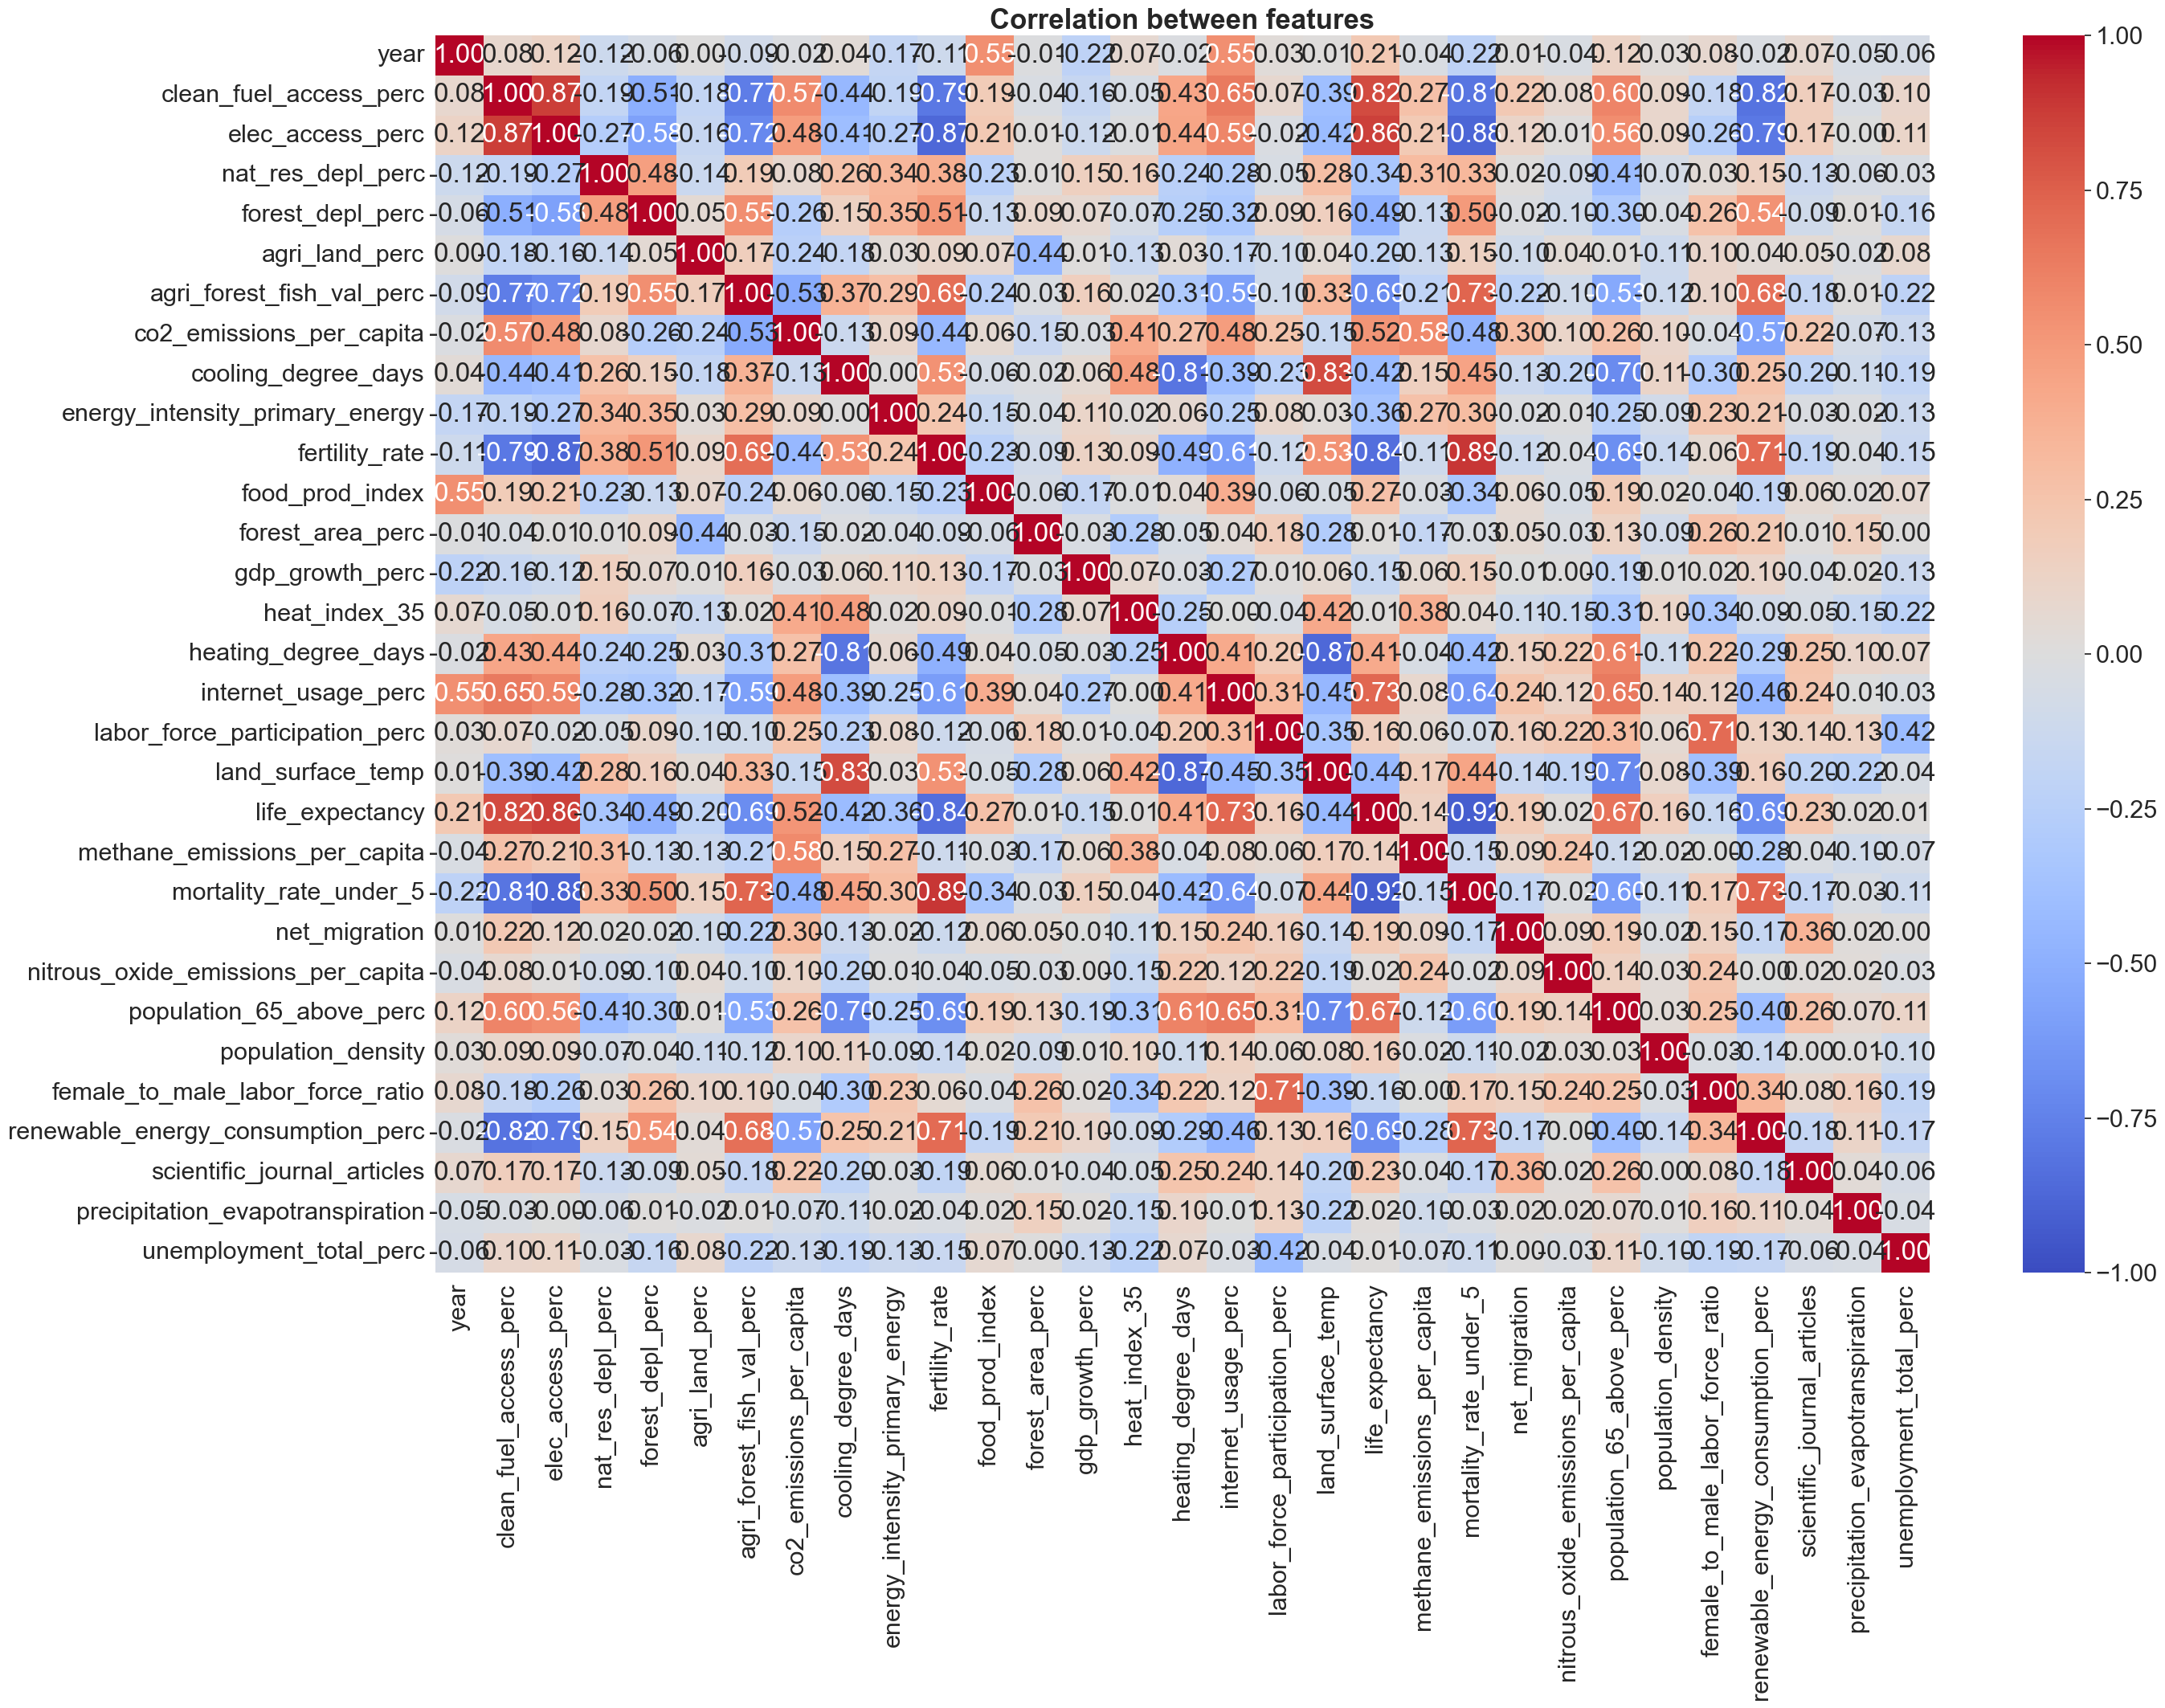

In [17]:
# Select only numeric features
features = data.select_dtypes(include=[np.number])

# Plot a correlation of all numeric features
# Correlation matrix
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold')
plt.show()

sns.set(font_scale=1)

This are too many features. In the following I will check for a reasonable Threshold for the correlation between the feature and our target variable and I will delete the features with a low correlation.

Total Features:  31
Threshold: 0.3, Number of features: 11
Threshold: 0.4, Number of features: 11
Threshold: 0.5, Number of features: 6
Threshold: 0.6, Number of features: 1
Threshold: 0.7, Number of features: 1
Threshold: 0.8, Number of features: 1


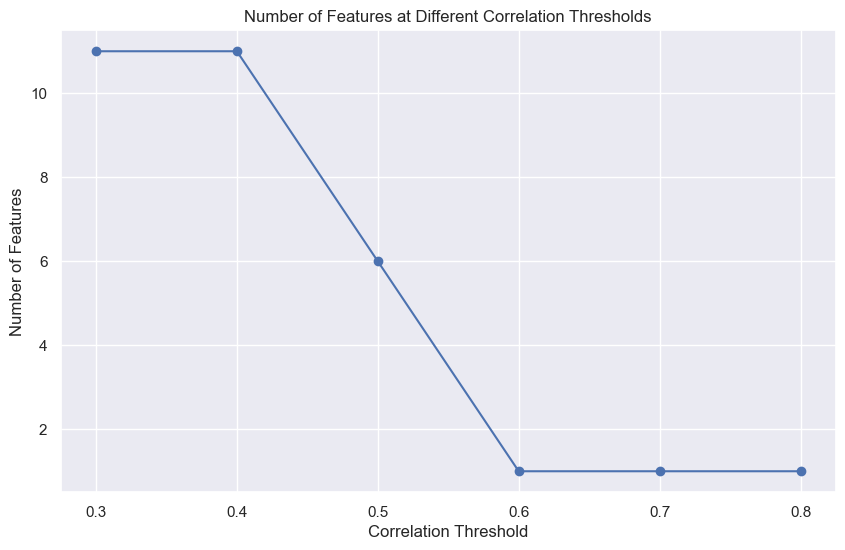

In [33]:
# Select only numeric features
features = data.select_dtypes(include=[np.number])

# Print the total number of numeric features
print("Total Features: ", features.shape[1])

# Compute the absolute correlation of each feature with the target variable
cor_target = features.corrwith(data['co2_emissions_per_capita']).abs()

# Function to get the number of features at different thresholds
def get_feature_counts(cor_target, thresholds):
    feature_counts = {}
    for threshold in thresholds:
        high_corr_features = cor_target[cor_target > threshold].index
        feature_counts[threshold] = len(high_corr_features)
    return feature_counts

# Define thresholds to test
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Get the number of features at each threshold
feature_counts = get_feature_counts(cor_target, thresholds)

# Print the results
for threshold, count in feature_counts.items():
    print(f"Threshold: {threshold}, Number of features: {count}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list(feature_counts.keys()), list(feature_counts.values()), marker='o')
plt.xlabel('Correlation Threshold')
plt.ylabel('Number of Features')
plt.title('Number of Features at Different Correlation Thresholds')
plt.grid(True)
plt.show()

I will first choose a Threshold of 0.5 to create a simpler model with less noise and then train another model with a treshold of 0.3 to compare the models based on their performance. 

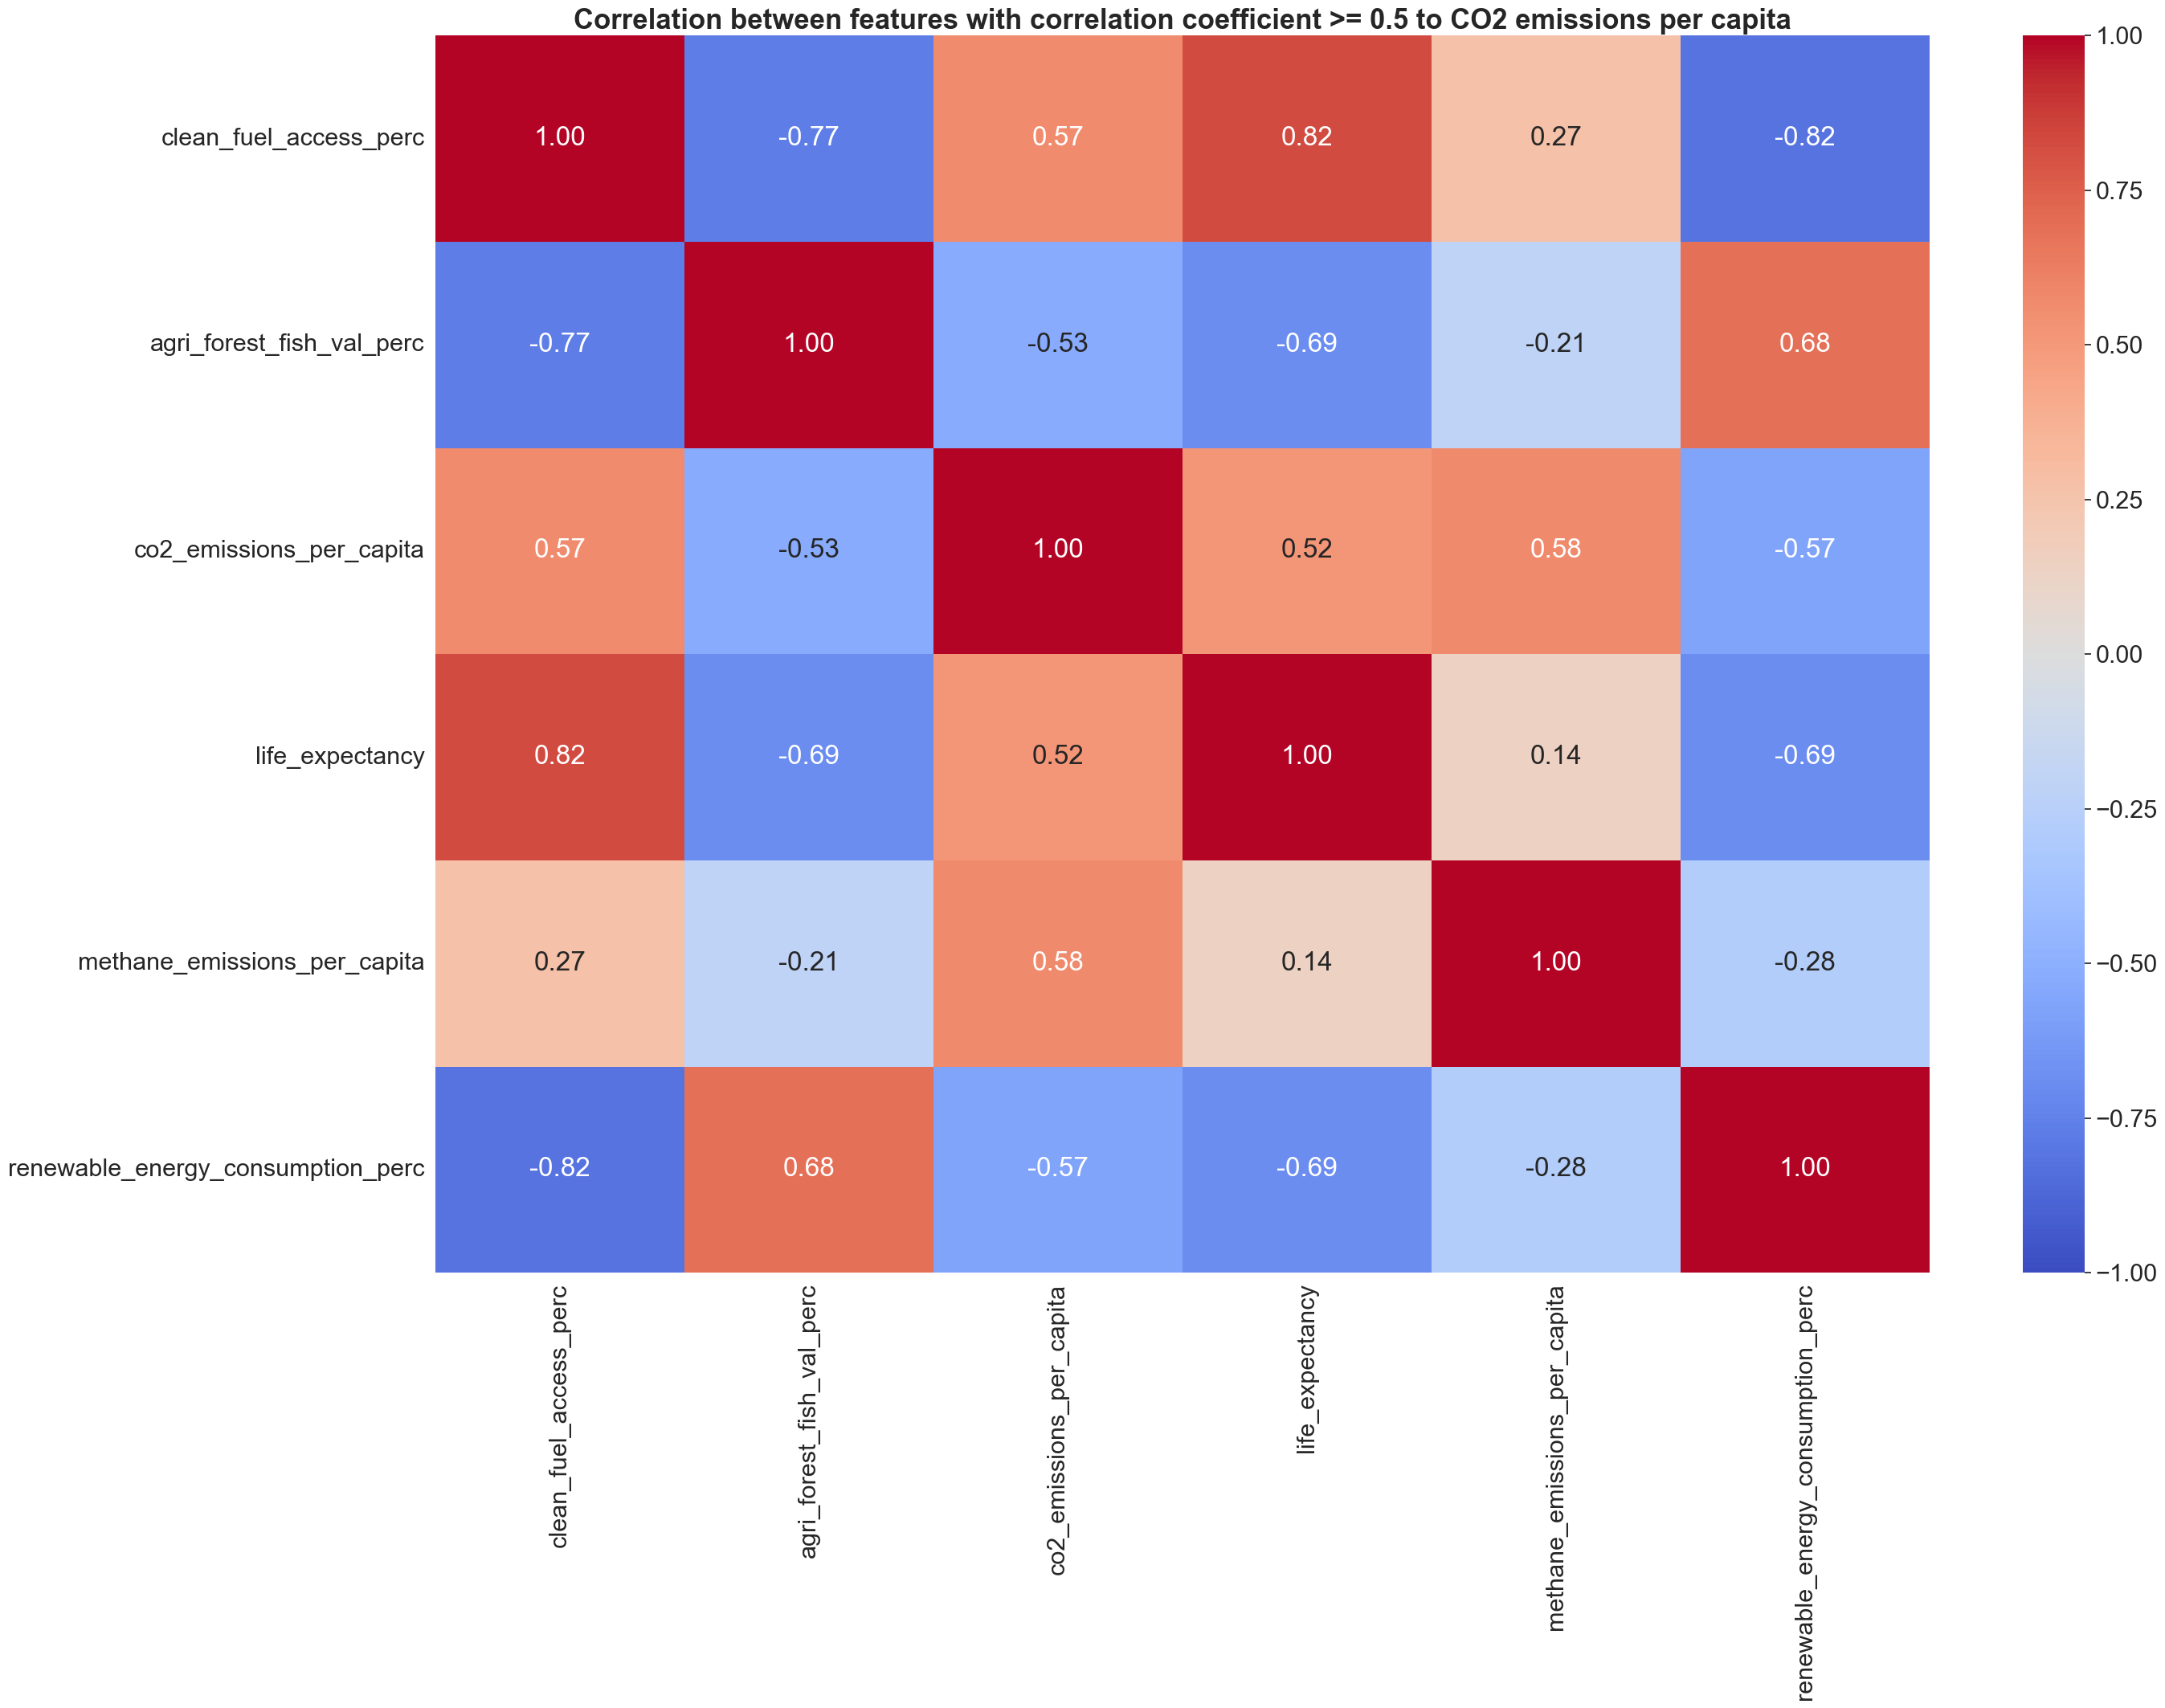

Total selected features:  6


In [49]:
# Features with a correlation under COR_TARGET to target variable (CO2) will be eliminated
COR_TARGET = 0.5

# Select only numeric features
numeric_features = data.select_dtypes(include=[np.number])

# Compute the absolute correlation of each feature with the target variable
cor_target = numeric_features.corrwith(data['co2_emissions_per_capita']).abs()

# Select features with a correlation coefficient higher than COR_TARGET
high_corr_features = cor_target[cor_target > COR_TARGET].index

# Filter the numeric features to include only those with high correlation
selected_numeric_features = numeric_features[high_corr_features]

# Add back the columns 'country' and 'year'
data_high_corr = data[['country', 'year']].join(selected_numeric_features)

# Plot a correlation of the filtered numeric features
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(selected_numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features with correlation coefficient >= 0.5 to CO2 emissions per capita', fontsize=25, weight='bold')
plt.show()

sns.set(font_scale=1)

# Print the total number of selected features
print("Total selected features: ", selected_numeric_features.shape[1])

In [50]:
data_high_corr.head()

,country,year,clean_fuel_access_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,life_expectancy,methane_emissions_per_capita,renewable_energy_consumption_perc
0,Albania,2000,38.7,24.515412,1.031568,75.404,1.186495,41.36
1,Albania,2001,41.0,22.716164,1.056868,75.639,1.178694,39.04
2,Albania,2002,43.8,22.025114,1.233002,75.890,1.167191,35.82
3,Albania,2003,46.5,21.978257,1.361159,76.142,1.175209,33.67
4,Albania,2004,49.2,20.537486,1.427944,76.376,1.156040,35.84


In [51]:
data[data_high_corr.columns]

,country,year,clean_fuel_access_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,life_expectancy,methane_emissions_per_capita,renewable_energy_consumption_perc
0,Albania,2000,38.7,24.515412,1.031568,75.404,1.186495,41.36
1,Albania,2001,41.0,22.716164,1.056868,75.639,1.178694,39.04
2,Albania,2002,43.8,22.025114,1.233002,75.890,1.167191,35.82
3,Albania,2003,46.5,21.978257,1.361159,76.142,1.175209,33.67
4,Albania,2004,49.2,20.537486,1.427944,76.376,1.156040,35.84
...,...,...,...,...,...,...,...,...
3355,Zimbabwe,2016,30.0,7.873986,0.723062,60.306,0.820551,82.07
3356,Zimbabwe,2017,29.8,8.340969,0.663069,60.709,0.816483,82.63
3357,Zimbabwe,2018,30.0,7.319375,0.735435,61.414,0.817171,80.43
3358,Zimbabwe,2019,30.2,9.819262,0.663338,61.292,0.811302,81.52


***

## 6. Prepare the visualizations

### Plotting preparation

#### Ensure easier labeling of the plots
In order to make the labeling of the variables within plots easier in the code, a dictionary with the column names and variable labels to use on axes is defined:
